In [109]:
import pandas as pd
import numpy as np
import geopandas
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
from colorspacious import cspace_converter

In [23]:
###first things first we will upload and clean the shapefile for the uk
filename = "Countries_December_2022_UK_BUC_7289844800559772083.geojson"
#path = geodatasets.get_path(filename)
gdf = geopandas.read_file(filename)
britain = gdf[~(gdf['CTRY22NM'] == "Northern Ireland")]
britain = britain.to_crs({"init": "epsg:27700"})

/opt/anaconda3/lib/python3.12/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

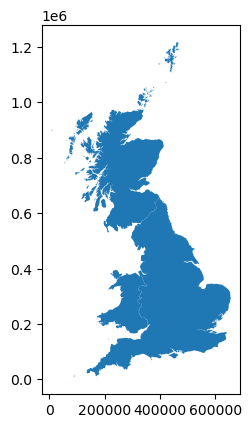

In [24]:
britain.plot()

In [25]:
coalseams = geopandas.read_file("mygeodata/Coal_GB_v1.geojson")
#coalseams = coalseams.to_crs({"init":"espg:4326"})

<Axes: >

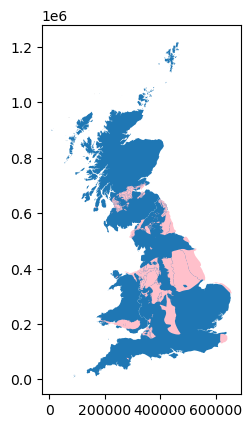

In [46]:
ax = britain.plot()
coalseams.plot(ax = ax, color = 'pink')

In [42]:
#exporting geojson files for code:

britain.to_file("britain_standard.geojson", driver = "GeoJSON")
coalseams.to_file("coal_seams.geojson", driver = "GeoJSON")

In [114]:
###importing socioeconomic csv data from ONS

socio_econ = pd.read_csv("uk_soc_econ.csv")
socio_econ = socio_econ.drop(columns = "Region").rename(columns = {"NUTS code": "nuts318cd"})
nuts = geopandas.read_file("nuts_shp3.geojson")
print(nuts.columns)

Index(['OBJECTID', 'nuts318cd', 'nuts318nm', 'bng_e', 'bng_n', 'long', 'lat',
       'GlobalID', 'geometry'],
      dtype='object')


In [120]:
#appending both dataframes
s_e_map = nuts.merge(socio_econ, on = "nuts318cd", how = "left")
s_e_map = s_e_map.to_crs({"init": "epsg:27700"})
s_e_map = s_e_map[0:-11]
display(s_e_map)

/opt/anaconda3/lib/python3.12/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,OBJECTID,nuts318cd,nuts318nm,bng_e,bng_n,long,lat,GlobalID,geometry,GDHI
0,1,UKC11,Hartlepool and Stockton-on-Tees,444952,522016,-1.30587,54.591351,4a77c5b7-be69-4d66-a064-747cbcde7c6a,"POLYGON ((447096.062 537153.134, 448289.155 53...",17200.0
1,2,UKC12,South Teesside,461718,519597,-1.04695,54.567848,6572cc86-883f-4320-88aa-82125b740894,"POLYGON ((464556.187 522502.017, 467292.176 52...",15800.0
2,3,UKC13,Darlington,428029,515649,-1.56835,54.535351,79e6c225-081a-489b-b58b-c9e0057aeb45,"POLYGON ((436387.259 522355.443, 437350.924 52...",17100.0
3,4,UKC14,Durham CC,410381,532242,-1.84050,54.685131,8a328e3e-df9d-426e-8b3c-95e8b216cf43,"POLYGON ((428365.228 554231.309, 428215.721 55...",16500.0
4,5,UKC21,Northumberland,395323,600699,-2.07521,55.300369,deea9dba-fb8b-4a8f-8b13-f4e8bcb2a9db,"MULTIPOLYGON (((397942.414 657534.634, 399999....",20400.0
...,...,...,...,...,...,...,...,...,...,...
163,164,UKM91,Scottish Borders,345891,626135,-2.85866,55.525940,2ae95d0b-2b54-4a88-b136-d83d2feee4aa,"POLYGON ((379999.519 670756.545, 383903.089 67...",20200.0
164,165,UKM92,Dumfries & Galloway,270645,579857,-4.02863,55.096218,919fec7e-2b32-406c-91e7-73e32cc90367,"POLYGON ((304665.764 614182.810, 306877.233 61...",18500.0
165,166,UKM93,East Ayrshire and North Ayrshire mainland,247081,608227,-4.41293,55.344212,31c5008f-d8ae-496d-822e-4e1b6038c839,"POLYGON ((225024.222 670151.818, 225278.221 66...",17300.0
166,167,UKM94,South Ayrshire,226544,596270,-4.72901,55.230068,28a0c215-0db1-48da-90da-7e076ea3a561,"POLYGON ((243296.907 588978.822, 242160.396 58...",19800.0


<Axes: >

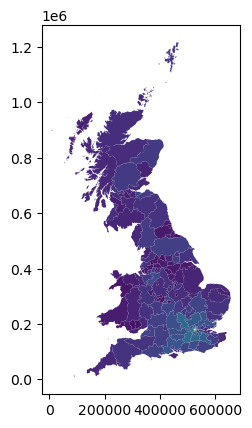

In [121]:
s_e_map.plot(column = "GDHI" )

In [123]:
s_e_map.to_file("gros_domestic_household_income_by_region.geojson", driver = "GeoJSON")